# 0. Environment Setting

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks


In [4]:
import pandas as pd
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Data loading

이번 개발에 사용한 데이터는 정부에서 운영하는 사이트인 AI HUB 를 통해서 확보하였음.<br>
https://aihub.or.kr/aidata/7978<br><br>
데이터 이용정책<br>
AI 허브에서 제공되는 인공지능 학습용 데이터(이하 ‘AI데이터’라고 함)는 과학기술정보통신부와 한국지능정보사회진흥원의 「지능정보산업 인프라 조성」 사업의 일환으로 구축되었으며, 본 사업의 유‧무형적 결과물인 데이터, AI 응용모델 및 데이터 저작도구의 소스, 각종 매뉴얼 등(이하 ‘AI데이터 등’)에 대한 일체의 권리는 AI데이터 등의 구축 수행기관 및 참여기관(이하 ‘수행기관 등’)과 한국지능정보사회진흥원에 있습니다.
본 AI데이터 등은 인공지능 기술 및 제품·서비스 발전을 위하여 구축하였으며, 지능형 제품・서비스, 챗봇 등 다양한 분야에서 영리적・비영리적 연구・개발 목적으로 활용할 수 있습니다.

In [5]:
start_execution_time = time.time()  # 시작 시간 저장

In [6]:
# 학습용, 검증용 엑셀 파일읽어들이기 약 30초 걸림.
df1 = pd.read_excel('./deep_learning_modeling/data/Sentiment_Training_Final.xlsx', sheet_name='287319')
df2 = pd.read_excel('./deep_learning_modeling/data/Sentiment_Validation_Final.xlsx', sheet_name='Sheet1')

In [7]:
df1.head()

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.
3,31303,노년,남성,재정,만성질환 무,기쁨,신이 난,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 후 첫 월급이라 정말 기쁘시겠어요.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,이 기분을 유지하려면 어떻게 해야 할까요?,회사생활을 열심히 해서 계속 월급을 받을거야!,계속 원하시는 대로 회사생활이 이어지길 바랄게요.,NaN,NaN
4,47200,노년,여성,재정,만성질환 유,기쁨,안도,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요?,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶으시군요.,NaN,NaN,NaN,NaN


In [8]:
df2.head()

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,23093,청년,여성,"진로, 취업, 직장",해당없음,분노,툴툴대는,요즘 부모님과 많이 부딪혀.,어떤 일로 부딪히시나요?,난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라고 하셔. 내 마음대로 하지도...,부모님과의 충돌로 힘드시겠군요.,응. 그래도 난 내가 하고 싶은 일을 위해 노력할 거야.,자신이 하고 싶은 일을 목표로 하기로 하셨군요.,NaN,NaN
1,32848,청소년,남성,가족관계,해당없음,슬픔,비통한,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,어머니께서 집을 나가셨다니 정말 슬프셨겠어요. 좀 더 자세히 얘기해주시겠어요?,엄마도 엄마만의 인생이 있을 테니 가지 말라고 할 수가 없었어. 그래서 더 마음이 ...,정말 많이 답답하셨겠어요. 어떻게 하는 게 기분이 좀 풀릴까요?,일단 좀 자야겠어.,일단 휴식을 가질 생각이시군요.,NaN,NaN
2,35590,청소년,남성,학교폭력/따돌림,해당없음,불안,조심스러운,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,용기 있는 행동을 하셨네요. 마음이 어떠셨나요?,그런데 말을 하고 난 후 나도 괴롭힐까 봐 불안했어.,그랬군요. 지금 기분에서 벗어나기 위해 할 수 있는 일에는 무엇이 있을까요?,나는 옳은 일을 한 거라고 생각해. 나까지 괴롭힌다면 신고할 거야.,지금의 상황이 나의 방식으로써 잘 해결될 수 있기를 바라요.,NaN,NaN
3,169,청년,남성,"진로, 취업, 직장",해당없음,당황,죄책감의,이번에 팀장님이 간단한 조사 업무를 부탁하셨는데 내가 잘못 처리했어. 너무 절망적이야.,팀장님이 부탁하신 업무를 잘못 처리하셔서 많이 당황하시고 놀라셨겠어요.,곧 있으면 인턴에서 정규직 전환 평가가 있는데 안 좋을 것 같아.,마음이 많이 안 좋으시겠어요. 지금 상황을 타개할 수 있는 가장 좋은 방안이 있을까요?,우선 잘못된 부분을 솔직하게 말씀드리고 수정하기 위해서 최선을 다해봐야겠어.,잘못된 부분을 잘 수정해서 좋은 결과가 있었으면 좋겠어요.,NaN,NaN
4,38435,중년,여성,"재정, 은퇴, 노후준비",해당없음,분노,노여워하는,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.,많이 화가 나시겠어요.,어떻게 그럴 수가 있지? 너무 화가 나.,어떻게 하면 지금의 감정을 추스를 수 있을까요?,나도 변호사를 고용해서 한번 얘기해보려고 해.,자녀분들이랑 함께 하며 슬픔을 극복하시길 바라요.,NaN,NaN


# 2. Data Preprocessing

In [9]:
# 원본 데이터의 구조 확인 및 복사본 생성
df_t = df1.copy()
df_v = df2.copy()
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40879 entries, 0 to 40878
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      40879 non-null  int64 
 1   연령      40879 non-null  object
 2   성별      40879 non-null  object
 3   상황키워드   40879 non-null  object
 4   신체질환    40879 non-null  object
 5   감정_대분류  40879 non-null  object
 6   감정_소분류  40879 non-null  object
 7   사람문장1   40879 non-null  object
 8   시스템응답1  40879 non-null  object
 9   사람문장2   40879 non-null  object
 10  시스템응답2  40879 non-null  object
 11  사람문장3   31059 non-null  object
 12  시스템응답3  31059 non-null  object
 13  사람문장4   1472 non-null   object
 14  시스템응답4  1362 non-null   object
dtypes: int64(1), object(14)
memory usage: 4.7+ MB


In [10]:
# 감정들이 얼마나 존재하는지 확인하고 Array 로 보관.
df_t['감정_대분류'].unique()

array(['기쁨', '불안', '당황', '슬픔', '분노', '상처', '불안 ', '기쁨 '], dtype=object)

In [11]:
# 혹시 모르니 검증용 데이터에서도 감정_대분류를 확인해 보자.
df_v['감정_대분류'].unique()

array(['분노', '슬픔', '불안', '당황', '상처', '기쁨'], dtype=object)

In [12]:
# 각 감정값들을 정수화 하기 위해서 딕셔너리랑 함수를 하나 만들자.
def map_sentiment(str):
  sent = {'기쁨':0, '불안':1, '당황':2, '슬픔':3, '분노':4, '상처':5, '불안 ':1, '기쁨 ':0}
  return sent[str]

# 그 다음에, 이 함수를 이용하여 '감정_대분류'의 문자들을 숫자로 치환하고 Sentiment 라는 컬럼을 만들어서 추가하자.
df_t['sentiment'] = [map_sentiment(x) for x in df_t['감정_대분류']]
df_v['sentiment'] = [map_sentiment(x) for x in df_v['감정_대분류']]

In [13]:
# 이제 불필요한 컬럼들을 모두 날림.
df_t.drop(['번호', '연령', '성별', '상황키워드', '신체질환', '감정_대분류', '감정_소분류'], axis=1, inplace=True)
df_v.drop(['번호', '연령', '성별', '상황키워드', '신체질환', '감정_대분류', '감정_소분류'], axis=1, inplace=True)

In [14]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40879 entries, 0 to 40878
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   사람문장1      40879 non-null  object
 1   시스템응답1     40879 non-null  object
 2   사람문장2      40879 non-null  object
 3   시스템응답2     40879 non-null  object
 4   사람문장3      31059 non-null  object
 5   시스템응답3     31059 non-null  object
 6   사람문장4      1472 non-null   object
 7   시스템응답4     1362 non-null   object
 8   sentiment  40879 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 2.8+ MB


In [15]:
df_t.head()

,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4,sentiment
0,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN,0
1,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN,1
2,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.,2
3,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 후 첫 월급이라 정말 기쁘시겠어요.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,이 기분을 유지하려면 어떻게 해야 할까요?,회사생활을 열심히 해서 계속 월급을 받을거야!,계속 원하시는 대로 회사생활이 이어지길 바랄게요.,NaN,NaN,0
4,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요?,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶으시군요.,NaN,NaN,NaN,NaN,0


In [16]:
def df_concat(df):
  # 대화가 들어있는 모든 컬럼을 'Sentence 컬럼 하나로 통일하자. 이 때, sentiment 는 그대로 승계한다.
  t1 = df[['사람문장1', 'sentiment']]
  t2 = df[['사람문장2', 'sentiment']]
  t3 = df[['사람문장3', 'sentiment']]
  t4 = df[['사람문장4', 'sentiment']]
  t5 = df[['시스템응답1', 'sentiment']]
  t6 = df[['시스템응답2', 'sentiment']]
  t7 = df[['시스템응답3', 'sentiment']]
  t8 = df[['시스템응답4', 'sentiment']]

  # 각 테이블들을 합치기 전에 컬럼명을 통일. 그래야 한 컬럼에 다 모여짐.
  t1.columns = ['sentence', 'sentiment']
  t2.columns = ['sentence', 'sentiment']
  t3.columns = ['sentence', 'sentiment']
  t4.columns = ['sentence', 'sentiment']
  t5.columns = ['sentence', 'sentiment']
  t6.columns = ['sentence', 'sentiment']
  t7.columns = ['sentence', 'sentiment']
  t8.columns = ['sentence', 'sentiment']

  # 테이블 모두 합치기
  df = pd.concat([t1,t2,t3,t4,t5,t6,t7,t8], ignore_index=True)
#  df = pd.concat([t1,t2,t3,t4], ignore_index=True)   # 시스템 응답들을 날려보자.
  return df

# 훈련용 데이터와 검증용 데이터에 같은 작업을 수행한다.
df_t = df_concat(df_t)
df_v = df_concat(df_v)

최종 데이터 정리에 앞서 한 가지 추가로 검토를 진행함. <br>
사람의 문장과 시스템 응답이 있는데, 시스템 응답은 사람의 문장에 비해 일상적인 반응에 가까운 문장들이 많이 들어가 있어서 감정표현이 약하다. 시스템의 응답을 학습데이터와 검증데이터에서 날리면 더 감정표현에 충실한 데이터들만 남을 것으로 예상된다.
막상 이 방법을 시도해 보니, 학습데이터 절반이 날아가면서 응답에서만 발견되는 유용한 정보들도 같이 사라졌다. train data 에 대한 accuracy 는 올라가지만, validation data 에 대해서는 효과가 없었고, free text 입력을 받아서 분석을 시도 했을 때는 데이터를 모두 활용하는 것 보다 좋지 못한(주관적임) 성능을 보였다.

In [17]:
# 훈련용 데이터가 작업이 잘 되었는지 확인
df_t.head()

,sentence,sentiment
0,아내가 드디어 출산하게 되어서 정말 신이 나.,0
1,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,1
2,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,2
3,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,0
4,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,0


In [18]:
# 검증용 데이터가 작업이 잘 되었는지 확인
df_v.head()

,sentence,sentiment
0,요즘 부모님과 많이 부딪혀.,4
1,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,3
2,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,1
3,이번에 팀장님이 간단한 조사 업무를 부탁하셨는데 내가 잘못 처리했어. 너무 절망적이야.,2
4,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.,4


In [19]:
# 전체 컬럼의 수와 데이터구조를 확인.
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327032 entries, 0 to 327031
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentence   228468 non-null  object
 1   sentiment  327032 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.0+ MB


In [20]:
# Null 값이 존재하는 행 삭제 후 결과 확인
df_t.dropna(inplace=True)
df_v.dropna(inplace=True)
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228468 entries, 0 to 327027
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentence   228468 non-null  object
 1   sentiment  228468 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ MB


In [21]:
# 데이터 중복이 있는지 확인
df_t['sentence'].nunique(), len(df_t)

(217294, 228468)

In [22]:
# 중복 확인되었음. 중복 데이터만 삭제하자.
df_t.drop_duplicates(subset=['sentence'], inplace=True)
df_t['sentence'].nunique(), len(df_t)

(217294, 217294)

In [23]:
# 그런데, 검증용 데이터에 대해서는 굳이 중복제거를 안해줘도 되지 않을까? 그래도 해 주자.
df_v.drop_duplicates(subset=['sentence'], inplace=True)
df_v['sentence'].nunique(), len(df_v)

(28338, 28338)

   sentiment  count
0          0  35839
1          1  39081
2          2  33792
3          3  36753
4          4  36573
5          5  35256


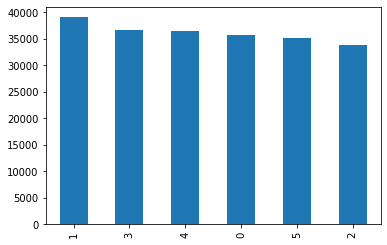

In [24]:
# 각 감정별로 어느정도의 학습데이터가 있는지 분포 확인
print(df_t.groupby('sentiment').size().reset_index(name='count'))
df_t['sentiment'].value_counts().plot(kind='bar')

   sentiment  count
0          0   4638
1          1   5026
2          2   4600
3          3   4742
4          4   4841
5          5   4491


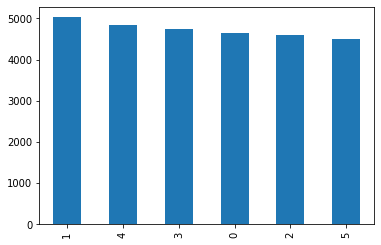

In [25]:
# 훈련용 데이터도 혹시나 확인을 한 번 해보자.
print(df_v.groupby('sentiment').size().reset_index(name='count'))
df_v['sentiment'].value_counts().plot(kind='bar')

Preprocessing 이 끝난 데이터는 따로 파일로 보관해 두자.

In [26]:
with pd.ExcelWriter('df_sentiment.xlsx') as writer:
  df_t.to_excel(writer, sheet_name='Train', header=True, index=False)
  df_v.to_excel(writer, sheet_name='Validate', header=True, index=False)

# 3. Tokenization & Encoding

## 1. Removing stop words

불용어(stop word)는 말하자면, 영어에서 관사, 정관사 같은 것을 말하는데, 문장내에서 엄청 자주 등장하지만 의미를 가지지 못하여 굳이 데이터처리를 할 필요가 없는 단어들을 말한다.<br>
한글 문장에서는 어떻게 처리를 해주어야 하나 고민을 하다가 알아낸 바로는 한국어에서는 특정 음절이나 단어를 제거하면 문장의 의미가 완전히 바뀌는 경우도 있다고 함.<br>
따라서 문장이 전달하는 정보의 손실을 최대한 줄이기 위해서 이번 개발에서는 불용어(stop word)제거는 적용하지 않기로 한다.

## 2. Tokenizing

토큰화 하는 방법은 여러 가지가 있을 수 있음.
*   단어(Hangul word) 단위로
*   음절(Hangul syllable) 단위로, 한글은 11,172 글자가 이론상 존재 가능함.
*   자소 단위로 (ㄱ, ㄴ, ㄷ, ..., ㅎ, ㅏ, ㅑ, ..., ㅣ)

그런데 이것저것 검토를 해 봤는데, 자소 단위나 음절 단위로는 의미를 살리기 어렵다는 문제가 있다. 단순 통계라면 괜찮겠지만, 문장의 의미를 파악해서 감정을 분류하는 문제에는 이 방식을 적용하기 어렵겠다는 생각.<br>
따라서 형태소 분석기가 꼭 필요하겠다라는 결론을 내림.

### 1. Colab 에서 사용할 수 있는 형태소 분석기(Mecab) 설치하기.

형태소분석기로는 konlpy 의 0kt, kkma, 등등 공개된 좋은 라이브러리들이 많은데, 다들 JDK 설치를 요구한다. 우리 과제에서는 공동 개발이라 동일한 환경 셋업이 필요하다. 따라서 Colab 환경에서 돌아가는 솔루션을 적용하는 것이 좋겠다는 생각이 들어서 Mecab 을 사용하기로 하였다.

In [27]:
# Mecab 설치용 스크립트 (약 3분 걸림)
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 448 kB 43.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/l

In [28]:
# 잘 설치되었는지 테스트
from konlpy.tag import Mecab
m = Mecab()
m.pos('아버지가방에들어가신다.')

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('신다', 'EP+EF'),
 ('.', 'SF')]

### 2. 형태소분석 실행 및 토큰생성

형태소 분석을 마치고 나서 토큰을 어떤 구조로 만들 것이가를 고민해야 함.<br>
토큰을 형태소만으로 저장? 데이터의 종류가 줄어드는 효과가 있음. 반면에, 같은 단어가 여러 품사로 쓰이는 경우에 대한 구분이 어려워지는 단점도 있어서, 이번 연구에서는 품사태깅한 정보를 묶어서 하나의 토큰으로 만들기로 결정하였음.

In [29]:
# 토큰분리용 함수. 품사도 같이 묶어준다. 같은 단어가 다른 품사로 쓰이는 경우가 많아서...
def tokenize(s):
  return ['/'.join(t) for t in m.pos(s)]

In [30]:
# 훈련용 데이터의 각 행들을 토큰화한 뒤에 train_docs 로 저장함. (약 1분 걸림)
train_docs = [tokenize(row[1]['sentence']) for row in df_t.iterrows()]
y_train = [row[1]['sentiment'] for row in df_t.iterrows()]

In [31]:
# 검증용 데이터에 대해서도 같은 작업을 해 주자.
test_docs = [tokenize(row[1]['sentence']) for row in df_v.iterrows()]
y_test = [row[1]['sentiment'] for row in df_v.iterrows()]

In [32]:
# 토큰화 결과를 확인
train_docs[0:2], test_docs[0:2]

([['아내/NNG',
   '가/JKS',
   '드디어/MAG',
   '출산/NNG',
   '하/XSV',
   '게/EC',
   '되/VV',
   '어서/EC',
   '정말/MAG',
   '신/NNG',
   '이/JKS',
   '나/NP',
   './SF'],
  ['당뇨/NNG',
   '랑/JKB',
   '합병증/NNG',
   '때문/NNB',
   '에/JKB',
   '먹/VV',
   '어야/EC',
   '할/VX+ETM',
   '약/MM',
   '이/NR',
   '열/NR',
   '가지/NNBC',
   '가/JKS',
   '넘어가/VV',
   '니까/EC',
   '스트레스/NNG',
   '야/VCP+EF',
   './SF']],
 [['요즘/NNG', '부모/NNG', '님/XSN', '과/JKB', '많이/MAG', '부딪/VV', '혀/EF', './SF'],
  ['엄마/NNG',
   '가/JKS',
   '결국/MAG',
   '집/NNG',
   '을/JKO',
   '나갔/VV+EP',
   '어/EF',
   './SF',
   '너무/MAG',
   '너무/MAG',
   '슬퍼/VA+EF',
   './SF']])

## 3. Encoding

In [33]:
# 정수 인코딩 (약 5초 걸림)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs)
print(tokenizer.word_index)

{'./sf': 1, '이/jks': 2, '을/jko': 3, '가/jks': 4, '고/ec': 5, '에/jkb': 6, '는/etm': 7, '를/jko': 8, '겠/ep': 9, '시/ep': 10, '?/sf': 11, '어/ef': 12, '하/xsv': 13, '하/vv': 14, '좋/va': 15, '군요/ef': 16, '도/jx': 17, '들/xsn': 18, '것/nnb': 19, '친구/nng': 20, '있/vv': 21, '이/vcp': 22, '어요/ef': 23, '나/np': 24, '같/va': 25, '수/nnb': 26, '지/ec': 27, '의/jkg': 28, '게/ec': 29, '는데/ec': 30, '하/xsa': 31, '는/jx': 32, '은/etm': 33, '면/ec': 34, '일/nng': 35, '셨/ep+ep': 36, '너무/mag': 37, '어떻게/mag': 38, '않/vx': 39, '생각/nng': 40, '을까요/ef': 41, '없/va': 42, '아/ef': 43, '잘/mag': 44, '으로/jkb': 45, '기/etn': 46, '는군요/ef': 47, '에게/jkb': 48, '에서/jkb': 49, '었/ep': 50, '한/xsa+etm': 51, '안/mag': 52, '은/jx': 53, '해/xsv+ec': 54, '어/ec': 55, '많이/mag': 56, '마음/nng': 57, '거/nnb': 58, '되/vv': 59, '아/ec': 60, '받/vv': 61, '님/xsn': 62, '내/np': 63, '있/va': 64, '로/jkb': 65, '사람/nng': 66, '말/nng': 67, '주/vx': 68, '더/mag': 69, '기분/nng': 70, '싶/vx': 71, '을/etm': 72, '상황/nng': 73, '걱정/nng': 74, '보/vx': 75, '만/jx': 76, '으면/ec': 77, '할/xsv+etm': 

23,063개의 단어가 추출되었음. 각 정수는 전체 학습데이터에서 등장 빈도순으로 번호가 부여되었기 때문에, 숫자가 클수록 등장 횟수가 작다는 것을 의미함. 따라서 너무 빈도수가 낮은 단어는 앞으로의 처리과정에서 배제하는 것도 생각해 볼만 함.

In [34]:
# 등장 횟수가 3회 미만인 단어들이 얼만큼 있는지 확인해 보자.
THRESHOLD = 3
total_cnt = len(tokenizer.word_index) # 총 단어의 수
rare_cnt = 0    # 등장 횟수가 작아서 걸러진 단어의 수
total_freq = 0  # 학습 데이터 전체 단어의 빈도수 총합
rare_freq = 0   # 등장 횟수가 작은 단어의 빈도수 총합
rare_words = []

for key, value in tokenizer.word_counts.items():
  total_freq += value
  if value < THRESHOLD:
    rare_cnt += 1
    rare_freq += value
    rare_words.append(key)

print('Size of vocab.:', total_cnt)
print('Num of rare words: ', rare_cnt)
print('Ratio of rare words: %.3f%%'%(rare_cnt*100.0/total_cnt))
print('Ratio of rare freq.: %.3f%%'%(rare_freq*100.0/total_freq))

Size of vocab.: 23063
Num of rare words:  9416
Ratio of rare words: 40.827%
Ratio of rare freq.: 0.343%


In [35]:
# rare words 는 어떤 것들이 있는지 확인해 보자.
rare_words[:10]

['한다더니/vv+ec',
 '튀어나와/vv+ec',
 '으/ep',
 '띄엄띄엄/mag',
 '체험학습/nnp',
 '그런대로/mag',
 '장난삼/vv',
 '한건데/vx+etm+nnb+vcp+ec',
 '연녀/nng',
 '말걸/vv+ef']

등장 빈도가 3회 미만(1, 2회)인 단어들은 전체 Vocab.에서 40%나 차지하는 것이 확인됨. 하지만, 실제 학습 데이터에서 등장 빈도는 0.34%밖에 되지 않았음.<br>
이걸 그대로 쓰면 차원이 커져서 연산에는 큰 부담을 주지만 실제 효과는 거의 미미할 것이라는 생각이 든다.<br>
이 단어들은 지금 걸러내서 추후 딥러닝모델의 학습 부담을 줄여주는 것이 좋겠다.

In [36]:
# 전체 단어 개수 중 빈도수가 2 이하인 단어는 제거하자.
# Zero-padding 을 고려하여 +1 을 한다.
vocab_size = total_cnt - rare_cnt + 1
print('Vocab. size:', vocab_size)

Vocab. size: 13648


23,063 --> 13,648 로 약 40% 가량 vocab 사이즈를 줄였음.

In [37]:
# max. number of words 값을 주고 정수인코딩 다시 수행함.
tokenizer = Tokenizer(num_words = vocab_size) 
tokenizer.fit_on_texts(train_docs)
X_train = tokenizer.texts_to_sequences(train_docs)
print(X_train[:3])

[[107, 4, 890, 634, 13, 29, 59, 80, 83, 1306, 2, 24, 1], [837, 243, 2190, 88, 6, 154, 369, 186, 3074, 832, 1572, 1254, 4, 2191, 207, 199, 118, 1], [1228, 6, 4506, 117, 2949, 100, 198, 1009, 2, 308, 3829, 160, 218, 1]]


In [38]:
# 동일한 토크나이저로 검증용데이터도 정수화시키자.
X_test = tokenizer.texts_to_sequences(test_docs)
print(X_test[:3])

[[325, 141, 62, 108, 56, 12225, 9939, 1], [194, 4, 2216, 164, 3, 1501, 12, 1, 37, 37, 356, 1], [201, 49, 169, 20, 8, 571, 7, 1000, 48, 930, 14, 152, 270, 12, 1]]


정수 인코딩을 진행하면서 빈도수가 낮은 데이터들은 다 걸러냈는데, 이 과정에서 모든 데이터가 걸러내어진 문장이 혹시나 있진 않을까? 그런 문장이 있는지 찾아보자. 그런데, 아마도 대부분의 문장에는 마침표가 있어서 이런 경우가 없을 것 같긴하다.

In [39]:
nodata_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
len(nodata_train)

0

역시 없었다. 굿!

## 4. Zero padding

서로 다른 길이의 학습데이터를 동일한 크기로 맞춰주는 작업을 진행함. 짧은 길이는 zero-padding 한다.

Max length: 79
Min length: 2
Avg length: 16.736614908833193


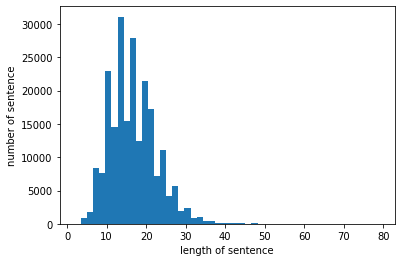

In [40]:
# 데이터 길이를 먼저 확인.
print('Max length:', max(len(l) for l in X_train))
print('Min length:', min(len(l) for l in X_train))
print('Avg length:', sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of sentence')
plt.ylabel('number of sentence')
plt.show()

가장 긴 문장은 79, 가장 짧은 문장은 2인 것을 확인함.
이제 고민인 것은 가장 긴 문장을 기준으로 학습데이터의 크기를 정하고 빈 공간을 모두 zero-padding 할 것인가? 아니면 아주 긴 문장을 좀 희생하더라도 데이터의 크기를 줄여볼 것인가? <br>
일단 MAX_LEN 을 50으로 정하고 얼마나 많은 데이터가 희생되어야 하는지 확인해 보자.

In [41]:
# 위의 히스토그램 상으로는 max 50 이상은 거의 없는 것 같은데, 얼마나 되는지 우선 확인을 해 보자.
MAX_LEN = 50

cnt = 0
for s in X_train:
  if(len(s) <= MAX_LEN):
    cnt += 1
print('Max length 이하인 샘플의 비율 %.3f%%'%(cnt*100.0/len(X_train)))

Max length 이하인 샘플의 비율 99.973%


이 비율이 0.027% 인 것을 확인.

In [42]:
X_train[:3]

[[107, 4, 890, 634, 13, 29, 59, 80, 83, 1306, 2, 24, 1],
 [837,
  243,
  2190,
  88,
  6,
  154,
  369,
  186,
  3074,
  832,
  1572,
  1254,
  4,
  2191,
  207,
  199,
  118,
  1],
 [1228, 6, 4506, 117, 2949, 100, 198, 1009, 2, 308, 3829, 160, 218, 1]]

1% 미만으로 데이터가 희생되는 것 같으니, 성능을 위해서 MAX_LEN 은 50으로 제한을 두자.

In [43]:
# 정해진 MAX_LEN 길이로 Zero-padding 하자.
# 학습데이터와 검증데이터 모두 해 주어야 함.
X_train = pad_sequences(X_train, maxlen=MAX_LEN)
X_test = pad_sequences(X_test, maxlen=MAX_LEN)

In [44]:
X_train[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  107,    4,  890,  634,   13,   29,   59,
          80,   83, 1306,    2,   24,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  837,
         243, 2190,   88,    6,  154,  369,  186, 3074,  832, 1572, 1254,
           4, 2191,  207,  199,  118,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 1228,    6, 4506,  117, 2949,  100,  198, 1009,
           2,  308, 38

In [45]:
y_train[:10]

[0, 1, 2, 0, 0, 1, 3, 4, 4, 3]

In [46]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[:10]

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [47]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((217294, 50), (217294, 6), (28338, 50), (28338, 6))

# 4. LSTM Modeling

## 1. Modeling and Training

In [49]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

In [50]:
model = Sequential()
# Add embedding layer using tf.keras.layers.Embedding
# output_dim = 128 차원으로 일단 설정
# Use masking to handle the variable sequence lengths
# 이미 테스트, 검증용 데이터의 사이즈를 통일시켰기 때문에 안해줘도 될 것 같긴 하지만, 그래도 모르니 mask_zero 는 True 로 설정하자.
model.add(Embedding(input_dim = vocab_size, output_dim = 64, mask_zero=True))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
# Add two Dense layers for final processing; one hidden layer with 64 units and one output layer
# 일단 Sigmoid 를 써보자. 교수님이 RNN 에서는 sigmoid 많이 쓴다고 하셨음.
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(6, activation='softmax'))

In [51]:
# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          873472    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 948,166
Trainable params: 948,166
Non-trainable params: 0
_________________________________________________________________


In [53]:
# 아래 파라미터들은 인터넷 서치해서 알아낸 값으로 일단 정한뒤에 계속 튜닝해보자.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [54]:
start_model_fitting_time = time.time()

In [55]:
history = model.fit(X_train, y_train,
                    batch_size=60, 
                    epochs=10, 
                    validation_steps=60,
                    callbacks=[es, mc], 
                    validation_split=0.2)

Epoch 1/10
2898/2898 [==============================] - 637s 208ms/step - loss: 1.4769 - accuracy: 0.3964 - val_loss: 1.3535 - val_accuracy: 0.4769

Epoch 00001: val_accuracy improved from -inf to 0.47694, saving model to best_model.h5
Epoch 2/10
2898/2898 [==============================] - 606s 209ms/step - loss: 1.2010 - accuracy: 0.5456 - val_loss: 1.3375 - val_accuracy: 0.4814

Epoch 00002: val_accuracy improved from 0.47694 to 0.48139, saving model to best_model.h5
Epoch 3/10
2898/2898 [==============================] - 615s 212ms/step - loss: 1.1310 - accuracy: 0.5743 - val_loss: 1.3460 - val_accuracy: 0.4808

Epoch 00003: val_accuracy did not improve from 0.48139
Epoch 4/10
2898/2898 [==============================] - 628s 217ms/step - loss: 1.0818 - accuracy: 0.5932 - val_loss: 1.3489 - val_accuracy: 0.4883

Epoch 00004: val_accuracy improved from 0.48139 to 0.48833, saving model to best_model.h5
Epoch 5/10
2898/2898 [==============================] - 626s 216ms/step - loss: 1.

In [56]:
end_model_fitting_time = time.time()

In [57]:
print("Elapsed time (model fitting) :", time.strftime('%H:%M:%S', time.localtime(end_model_fitting_time - start_model_fitting_time)))

Elapsed time (model fitting) : 01:12:30


In [58]:
fname = time.strftime('LSTM_%Y-%m-%d_%H-%M-%S.h5', time.localtime(time.time()))
model.save('best_model.h5')
model.save(fname)   # 장기 보관을 위해서 파일명을 날짜/시간의 조합으로 지정하고 한 벌을 더 저장함.

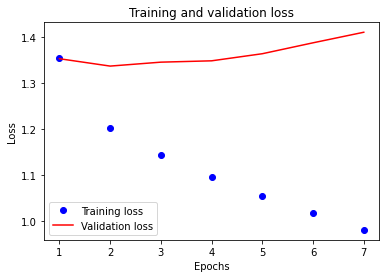

In [71]:
# loss 그래프를 그려보자.
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

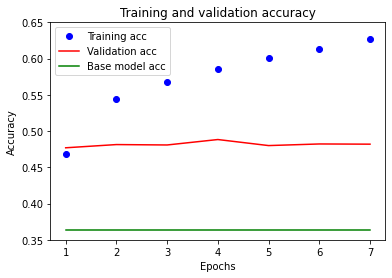

In [78]:
# Accuracy Graph 도 그려보자.
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
base_acc = [0.3638,0.3638,0.3638,0.3638,0.3638,0.3638,0.3638]
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.plot(epochs, base_acc, 'g', label='Base model acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.35, 0.65)
plt.legend()

plt.show()

# 5. Validation

AI HUB 에서 받은 검증용데이터로 모델을 검증해보자.

In [61]:
start_validation_time = time.time()

In [62]:
loaded_model = load_model('best_model.h5')
score = loaded_model.evaluate(X_test, y_test)
print('Validation Loss : %.4f, Validation Accuracy: %.4f'%(score[0],score[1]))

886/886 [==============================] - 23s 23ms/step - loss: 1.4683 - accuracy: 0.4786
Validation Loss : 1.4683, Validation Accuracy: 0.4786


In [63]:
end_validation_time = time.time()

In [64]:
print("Elapsed time (validating):", time.strftime('%H:%M:%S', time.localtime(end_validation_time - start_validation_time)))

Elapsed time (validating): 00:00:24


In [65]:
# 이용자가 알아보기 쉽게 결과를 분석해서 출력해 주는 함수들.
def sentiment_predict(sentence, log=False):
  sentences = tokenize(sentence)
  encoded = tokenizer.texts_to_sequences([sentences])
  padded = pad_sequences(encoded, maxlen=MAX_LEN)
  score = loaded_model.predict(padded)
  if log:
    print('Predict score: ', score)
  return score

def print_sentiment(lst):
  sent = ['기쁨', '불안', '당황', '슬픔', '분노', '상처']
  return sent[np.argmax(lst)]

In [66]:
# 자유롭게 문장을 입력해보자.
messages = ['어제 한국과 일본이 배구경기를 했는데, 한국이 이겼어.',
            '어제 한국과 일본이 배구경기를 했는데, 한국이 이겼어. 그런데 나는 일본사람이야.',
            '어제 한국과 일본이 배구경기를 했는데, 한국이 이겼어. 그런데 나는 한국사람이야.',
            '어제 한국과 일본이 배구경기를 했는데, 한국이 이겼어. 그런데 나는 중국사람이야.',
            '하루종일 아무것도 먹지 않았더니 몸에 힘이 없어.',
            '신규확진 1823명, 열흘만에 다시 1800명 역대 세 번째 큰 규모',
            '오늘 날씨가 너무 더워서 공부하기 힘들어',
            '니가 어떻게 나에게 이럴 수가 있어?',
            '오늘 낮에 내가 황당한 스팸 문자를 받았어',
            '아니 왜 가만히 있는 우리를 괴롭히는거야?',
            '약속시간에 늦었어, 어떡하지?',
            # 아주 짧은 문장은 어떻게 될지
            '이게 되네?',
            # 엄청 긴 문장은 과연...
            '지난 7월 소비자물가 상승률이 연중 최고치인 2.6%인 것으로 확인되면서 하반기부터는 물가가 2% 이내로 안정화될 것이라는 정부 전망은 빗나갔다. 한은이 제시한 물가안정목표치(2.0%)도 훌쩍 넘길 가능성이 커지고 있다. 물가 불안이 확대되자 정부는 ‘물가 잡기’ 총력전을 펼치는 상황이다. 작황 부진과 폭염으로 인한 폐사 등으로 서민 체감이 큰 밥상 물가가 크게 오르고, 부동산 정책 실패로 집세는 천정부지인데다 수요회복으로 서비스 가격이 뛰는 등 “안오르는게 없는” 상황에 민심 역시 악화되고 있기 때문이다. 특히 지난 5월 조류독감(AI)가 종식됐는데도 가격이 내리지 않는 계란을 놓고는, 문재인 대통령이 직접 “달걀은 필수 먹거리인 만큼 소비자들에게도 피해가 갈 수 있으니 생산단계, 유통단계, 판매단계를 점검하라”고 부처들에 주문하기도 했다. 계란값 잡기에는 물가 총괄 부처인 기재부와 함께 농림부가 나섰고, 여기에 공정거래위원회까지 담합 가능성을 살펴보겠다며 가담한 상태다.'
]

for msg in messages:
  res = sentiment_predict(msg, True)
  print('입력문장: ', msg)
  print('감정상태: ', print_sentiment(res), '\n')

Predict score:  [[8.1624174e-01 1.5620810e-01 6.1138696e-03 1.4230031e-02 6.4509716e-03
  7.5530162e-04]]
입력문장:  어제 한국과 일본이 배구경기를 했는데, 한국이 이겼어.
감정상태:  기쁨 

Predict score:  [[0.00141998 0.9655764  0.00202262 0.02516425 0.00474937 0.00106735]]
입력문장:  어제 한국과 일본이 배구경기를 했는데, 한국이 이겼어. 그런데 나는 일본사람이야.
감정상태:  불안 

Predict score:  [[0.37224495 0.56873935 0.01171442 0.03533003 0.0108143  0.00115696]]
입력문장:  어제 한국과 일본이 배구경기를 했는데, 한국이 이겼어. 그런데 나는 한국사람이야.
감정상태:  불안 

Predict score:  [[0.35518342 0.59623885 0.01709898 0.01962079 0.01077122 0.00108672]]
입력문장:  어제 한국과 일본이 배구경기를 했는데, 한국이 이겼어. 그런데 나는 중국사람이야.
감정상태:  불안 

Predict score:  [[0.00964867 0.13652498 0.34944278 0.4435235  0.01296428 0.04789577]]
입력문장:  하루종일 아무것도 먹지 않았더니 몸에 힘이 없어.
감정상태:  슬픔 

Predict score:  [[0.00799743 0.1383052  0.5740324  0.22646193 0.01080317 0.04239974]]
입력문장:  신규확진 1823명, 열흘만에 다시 1800명 역대 세 번째 큰 규모
감정상태:  당황 

Predict score:  [[0.21173091 0.37205744 0.11243275 0.05510021 0.05294543 0.19573317]]
입력문장:  오늘 날씨가 너무 더워서 공부하기 힘들

In [67]:
end_execution_time = time.time()

In [68]:
print("Elapsed time (Overall):", time.strftime('%H:%M:%S', time.localtime(end_execution_time - start_execution_time)))

Elapsed time (Overall): 01:18:02
